In [1]:
import sys
import os
import scipy.ndimage as nd
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as sk
from utils import utils
plt.style.use('ggplot')

In [2]:
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms as tfs
from torch.utils import data

import torch

#### Load datasets

In [5]:
imagenet_data = datasets.ImageFolder('data/png_clasificados/',
                                     transform=tfs.Compose([tfs.RandomAffine(0., scale=(0.5, 1.), fillcolor=0),
                                                           tfs.Resize((112, 112)),
                                                           tfs.Grayscale(1)]))

data_loader = data.DataLoader(imagenet_data, batch_size=4, shuffle=True)

(<PIL.Image.Image image mode=L size=112x112 at 0x7F1390A2F358>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F1390989240>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F13909457B8>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F139097F470>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F1390983F60>, 0)


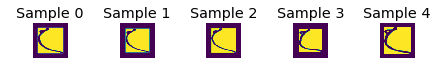

In [6]:
fig = plt.figure()

for i in range(len(imagenet_data)):
    sample = imagenet_data[i + 10]
    print(sample)
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    plt.imshow(np.asarray(sample[0]))
    # print(np.asarray(sample[0]))
    ax.set_title('Sample {}'.format(i))
    ax.axis('off')

    if i == 4:
        plt.show()
        break

#### Define generator & GAN

In [5]:
from models.generator import _G
from models.discriminator import _D
from models.gan import GAN

In [ ]:
import time
import pickle

transforms = [tfs.RandomAffine(0, scale=(0.3, 1.)),
              tfs.Resize((112, 112)),
              tfs.Grayscale(1),
              tfs.ToTensor()]

gan = GAN(epochs=100, input_h_w=112, data_path='data/png_clasificados/',
          transforms=transforms)
gan.train()
print("Training finished!")

# visualize learned generator
gan.visualize_results(gan.epoch)


In [ ]:
from IPython.display import Image

with open('/tmp/GAN_epochs.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

#### Process type of vessels for classification

In [2]:
df = utils.create_df_from_files()
destination = "data/perfiles_CATA/png_clasificados/"
path = "data/perfiles_CATA/png"
utils.create_folder_pytorch_format(df, destination, path)

data/perfiles_CATA/png/AL_08C.png
data/perfiles_CATA/png/AL_13B.png
data/perfiles_CATA/png/AL_14B.png
data/perfiles_CATA/png/BA115_4.png
data/perfiles_CATA/png/BA172_3.png
data/perfiles_CATA/png/BA191_2.png
data/perfiles_CATA/png/BA191_3.png
data/perfiles_CATA/png/BA191_4.png
data/perfiles_CATA/png/BA208_2.png
data/perfiles_CATA/png/BA208_3.png
data/perfiles_CATA/png/BA42_2.png
data/perfiles_CATA/png/BA43_3.png
data/perfiles_CATA/png/BA44_1.png
data/perfiles_CATA/png/BA45_3.png
data/perfiles_CATA/png/BA45_4.png
data/perfiles_CATA/png/CCCATA_9_09.png
data/perfiles_CATA/png/CCCATA_9_13.png
data/perfiles_CATA/png/CCCATA_9_14.png
data/perfiles_CATA/png/GI_anf01.png
data/perfiles_CATA/png/LP17_1.png
data/perfiles_CATA/png/MB_01.png
data/perfiles_CATA/png/MB_03.png
data/perfiles_CATA/png/TU110_1.png
data/perfiles_CATA/png/TU110_2.png
data/perfiles_CATA/png/TU110_3.png
data/perfiles_CATA/png/TU110_4.png
data/perfiles_CATA/png/TU13.png
data/perfiles_CATA/png/TU8_1.png
data/perfiles_CATA/png/TU

data/perfiles_CATA/png/BA102_3.png
data/perfiles_CATA/png/BA104_2.png
data/perfiles_CATA/png/BA1_1.png
data/perfiles_CATA/png/BA111_3.png
data/perfiles_CATA/png/BA111_4.png
data/perfiles_CATA/png/BA111_5.png
data/perfiles_CATA/png/BA11_2.png
data/perfiles_CATA/png/BA113_6.png
data/perfiles_CATA/png/BA117_1.png
data/perfiles_CATA/png/BA117_2.png
data/perfiles_CATA/png/BA120_2.png
data/perfiles_CATA/png/BA120_3.png
data/perfiles_CATA/png/BA13_3.png
data/perfiles_CATA/png/BA135_3.png
data/perfiles_CATA/png/BA135_4.png
data/perfiles_CATA/png/BA136_1.png
data/perfiles_CATA/png/BA136_2.png
data/perfiles_CATA/png/BA137_2.png
data/perfiles_CATA/png/BA137_3.png
data/perfiles_CATA/png/BA137_5.png
data/perfiles_CATA/png/BA138_2.png
data/perfiles_CATA/png/BA138_3.png
data/perfiles_CATA/png/BA140_3.png
data/perfiles_CATA/png/BA140_4.png
data/perfiles_CATA/png/BA14_2.png
data/perfiles_CATA/png/BA143_3.png
data/perfiles_CATA/png/BA145_2.png
data/perfiles_CATA/png/BA159_1.png
data/perfiles_CATA/png/BA

data/perfiles_CATA/png/TO3_8.png
data/perfiles_CATA/png/TO3_9.png
data/perfiles_CATA/png/TU07.png
data/perfiles_CATA/png/TU08.png
data/perfiles_CATA/png/TU102_1.png
data/perfiles_CATA/png/TU11_4.png
data/perfiles_CATA/png/TU11_5.png
data/perfiles_CATA/png/TU19_1.png
data/perfiles_CATA/png/TU19_10.png
data/perfiles_CATA/png/TU19_11.png
data/perfiles_CATA/png/TU19_13.png
data/perfiles_CATA/png/TU19_5.png
data/perfiles_CATA/png/TU19_7.png
data/perfiles_CATA/png/TU26_2.png
data/perfiles_CATA/png/TU44_1.png
data/perfiles_CATA/png/TU87_2.png
data/perfiles_CATA/png/TU87_5.png
data/perfiles_CATA/png/TU96_10.png
data/perfiles_CATA/png/TU96_11.png
data/perfiles_CATA/png/TU96_12.png
data/perfiles_CATA/png/TU96_9.png
data/perfiles_CATA/png/TU97_3.png
data/perfiles_CATA/png/VI56_1.png
data/perfiles_CATA/png/VI56_2.png
data/perfiles_CATA/png/VI56_3.png
data/perfiles_CATA/png/VI58_1.png
data/perfiles_CATA/png/VI58_2.png
data/perfiles_CATA/png/VI58_3.png
data/perfiles_CATA/png/VI59_1.png
data/perfiles

data/perfiles_CATA/png/PN73_61.png
data/perfiles_CATA/png/PN73_62.png
data/perfiles_CATA/png/PN74_65.png
data/perfiles_CATA/png/PN76_71.png
data/perfiles_CATA/png/PN78_75.png
data/perfiles_CATA/png/PN92_789.png
data/perfiles_CATA/png/PN9_5.png
data/perfiles_CATA/png/PO017.png
data/perfiles_CATA/png/PO018.png
data/perfiles_CATA/png/PO020.png
data/perfiles_CATA/png/PO021.png
data/perfiles_CATA/png/PO022.png
data/perfiles_CATA/png/PO023.png
data/perfiles_CATA/png/PO028.png
data/perfiles_CATA/png/PO029.png
data/perfiles_CATA/png/TO4_2.png
data/perfiles_CATA/png/TO4_3.png
data/perfiles_CATA/png/TO4_4.png
data/perfiles_CATA/png/TO4_5.png
data/perfiles_CATA/png/TU09.png
data/perfiles_CATA/png/TU102_3.png
data/perfiles_CATA/png/TU109_1.png
data/perfiles_CATA/png/TU11_3.png
data/perfiles_CATA/png/TU12.png
data/perfiles_CATA/png/TU19_12.png
data/perfiles_CATA/png/TU19_14.png
data/perfiles_CATA/png/TU19_15.png
data/perfiles_CATA/png/TU19_2.png
data/perfiles_CATA/png/TU19_4.png
data/perfiles_CATA/

data/perfiles_CATA/png/LP14_2.png
data/perfiles_CATA/png/LP15_3.png
data/perfiles_CATA/png/LP15_5.png
data/perfiles_CATA/png/LP8_1.png
data/perfiles_CATA/png/LP8_2.png
data/perfiles_CATA/png/LP9_1.png
data/perfiles_CATA/png/MB_14.png
data/perfiles_CATA/png/MB_25.png
data/perfiles_CATA/png/MB_27.png
data/perfiles_CATA/png/PO019.png
data/perfiles_CATA/png/PO025.png
data/perfiles_CATA/png/PO03.png
data/perfiles_CATA/png/TO3_7.png
data/perfiles_CATA/png/TU27_1.png
data/perfiles_CATA/png/TU27_2.png
data/perfiles_CATA/png/TU91_3.png
data/perfiles_CATA/png/TU96_8.png


#### Build and train classifier

In [3]:
imagenet_data = datasets.ImageFolder('data/perfiles_CATA/png_clasificados/',
                                     transform=tfs.Compose([#tfs.RandomAffine(0, scale=(0.5, 1.), fillcolor=0),
                                                           tfs.Resize((28, 28)),
                                                           tfs.Grayscale(1),
                                                           tfs.ToTensor()]))

#data_loader = data.DataLoader(imagenet_data, batch_size=64, shuffle=True)

In [ ]:
len(imagenet_data.samples), round(1133*0.25), round(1133*0.75)

In [4]:
splits = utils.random_split(imagenet_data, [283, 850])

train_loader = data.DataLoader(splits[1], batch_size=4, shuffle=True)
val_loader = data.DataLoader(splits[0], batch_size=4, shuffle=True)


In [5]:
len(splits[1])

850

In [76]:
import torch.optim as optim
from torch import nn
from models.classifier import _C

C = _C(input_h_w=28)
C = C.cuda()
criterion = nn.CrossEntropyLoss().cuda()
C_optimizer = optim.Adam(C.parameters(), lr=0.0002, betas=(0.5, 0.999))

for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data_ in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data_
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        C_optimizer.zero_grad()

        # forward + backward + optimize
        outputs = C(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        C_optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9: 
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 2.294
[1,    20] loss: 2.146
[1,    30] loss: 2.056
[1,    40] loss: 2.038
[1,    50] loss: 2.023
[1,    60] loss: 2.043
[1,    70] loss: 2.014
[1,    80] loss: 1.978
[1,    90] loss: 1.970
[1,   100] loss: 2.011
[1,   110] loss: 1.968
[1,   120] loss: 1.897
[1,   130] loss: 1.956
[1,   140] loss: 1.955
[1,   150] loss: 1.883
[1,   160] loss: 1.818
[1,   170] loss: 1.920
[1,   180] loss: 1.877
[1,   190] loss: 1.858
[1,   200] loss: 1.859
[1,   210] loss: 1.840
[2,    10] loss: 1.857
[2,    20] loss: 1.807
[2,    30] loss: 1.780
[2,    40] loss: 1.816
[2,    50] loss: 1.883
[2,    60] loss: 1.781
[2,    70] loss: 1.787
[2,    80] loss: 1.824
[2,    90] loss: 1.759
[2,   100] loss: 1.808
[2,   110] loss: 1.906
[2,   120] loss: 1.753
[2,   130] loss: 1.809
[2,   140] loss: 1.769
[2,   150] loss: 1.788
[2,   160] loss: 1.842
[2,   170] loss: 1.841
[2,   180] loss: 1.729
[2,   190] loss: 1.817
[2,   200] loss: 1.811
[2,   210] loss: 1.754
[3,    10] loss: 1.763
[3,    20] 

[17,   150] loss: 1.650
[17,   160] loss: 1.657
[17,   170] loss: 1.653
[17,   180] loss: 1.696
[17,   190] loss: 1.588
[17,   200] loss: 1.622
[17,   210] loss: 1.651
[18,    10] loss: 1.608
[18,    20] loss: 1.644
[18,    30] loss: 1.627
[18,    40] loss: 1.607
[18,    50] loss: 1.597
[18,    60] loss: 1.594
[18,    70] loss: 1.644
[18,    80] loss: 1.623
[18,    90] loss: 1.616
[18,   100] loss: 1.624
[18,   110] loss: 1.648
[18,   120] loss: 1.612
[18,   130] loss: 1.579
[18,   140] loss: 1.597
[18,   150] loss: 1.599
[18,   160] loss: 1.626
[18,   170] loss: 1.667
[18,   180] loss: 1.647
[18,   190] loss: 1.650
[18,   200] loss: 1.646
[18,   210] loss: 1.606
[19,    10] loss: 1.651
[19,    20] loss: 1.644
[19,    30] loss: 1.622
[19,    40] loss: 1.585
[19,    50] loss: 1.639
[19,    60] loss: 1.583
[19,    70] loss: 1.641
[19,    80] loss: 1.589
[19,    90] loss: 1.617
[19,   100] loss: 1.609
[19,   110] loss: 1.604
[19,   120] loss: 1.593
[19,   130] loss: 1.592
[19,   140] loss

[34,    10] loss: 1.601
[34,    20] loss: 1.659
[34,    30] loss: 1.584
[34,    40] loss: 1.628
[34,    50] loss: 1.624
[34,    60] loss: 1.579
[34,    70] loss: 1.618
[34,    80] loss: 1.595
[34,    90] loss: 1.583
[34,   100] loss: 1.623
[34,   110] loss: 1.625
[34,   120] loss: 1.579
[34,   130] loss: 1.603
[34,   140] loss: 1.657
[34,   150] loss: 1.575
[34,   160] loss: 1.642
[34,   170] loss: 1.595
[34,   180] loss: 1.624
[34,   190] loss: 1.656
[34,   200] loss: 1.588
[34,   210] loss: 1.618
[35,    10] loss: 1.627
[35,    20] loss: 1.609
[35,    30] loss: 1.567
[35,    40] loss: 1.557
[35,    50] loss: 1.570
[35,    60] loss: 1.592
[35,    70] loss: 1.594
[35,    80] loss: 1.636
[35,    90] loss: 1.636
[35,   100] loss: 1.576
[35,   110] loss: 1.585
[35,   120] loss: 1.619
[35,   130] loss: 1.601
[35,   140] loss: 1.636
[35,   150] loss: 1.581
[35,   160] loss: 1.618
[35,   170] loss: 1.594
[35,   180] loss: 1.625
[35,   190] loss: 1.647
[35,   200] loss: 1.608
[35,   210] loss

[50,    80] loss: 1.584
[50,    90] loss: 1.589
[50,   100] loss: 1.630
[50,   110] loss: 1.581
[50,   120] loss: 1.554
[50,   130] loss: 1.585
[50,   140] loss: 1.570
[50,   150] loss: 1.618
[50,   160] loss: 1.562
[50,   170] loss: 1.599
[50,   180] loss: 1.554
[50,   190] loss: 1.636
[50,   200] loss: 1.581
[50,   210] loss: 1.590
[51,    10] loss: 1.562
[51,    20] loss: 1.631
[51,    30] loss: 1.705
[51,    40] loss: 1.649
[51,    50] loss: 1.586
[51,    60] loss: 1.634
[51,    70] loss: 1.590
[51,    80] loss: 1.583
[51,    90] loss: 1.693
[51,   100] loss: 1.584
[51,   110] loss: 1.595
[51,   120] loss: 1.557
[51,   130] loss: 1.571
[51,   140] loss: 1.579
[51,   150] loss: 1.554
[51,   160] loss: 1.653
[51,   170] loss: 1.586
[51,   180] loss: 1.563
[51,   190] loss: 1.589
[51,   200] loss: 1.630
[51,   210] loss: 1.601
[52,    10] loss: 1.585
[52,    20] loss: 1.578
[52,    30] loss: 1.556
[52,    40] loss: 1.552
[52,    50] loss: 1.602
[52,    60] loss: 1.635
[52,    70] loss

[66,   160] loss: 1.665
[66,   170] loss: 1.594
[66,   180] loss: 1.605
[66,   190] loss: 1.606
[66,   200] loss: 1.599
[66,   210] loss: 1.585
[67,    10] loss: 1.608
[67,    20] loss: 1.609
[67,    30] loss: 1.629
[67,    40] loss: 1.605
[67,    50] loss: 1.560
[67,    60] loss: 1.575
[67,    70] loss: 1.563
[67,    80] loss: 1.588
[67,    90] loss: 1.574
[67,   100] loss: 1.602
[67,   110] loss: 1.589
[67,   120] loss: 1.575
[67,   130] loss: 1.556
[67,   140] loss: 1.599
[67,   150] loss: 1.578
[67,   160] loss: 1.553
[67,   170] loss: 1.551
[67,   180] loss: 1.555
[67,   190] loss: 1.600
[67,   200] loss: 1.591
[67,   210] loss: 1.576
[68,    10] loss: 1.555
[68,    20] loss: 1.586
[68,    30] loss: 1.602
[68,    40] loss: 1.638
[68,    50] loss: 1.570
[68,    60] loss: 1.554
[68,    70] loss: 1.561
[68,    80] loss: 1.637
[68,    90] loss: 1.583
[68,   100] loss: 1.560
[68,   110] loss: 1.568
[68,   120] loss: 1.557
[68,   130] loss: 1.569
[68,   140] loss: 1.599
[68,   150] loss

[83,    10] loss: 1.555
[83,    20] loss: 1.559
[83,    30] loss: 1.642
[83,    40] loss: 1.580
[83,    50] loss: 1.554
[83,    60] loss: 1.550
[83,    70] loss: 1.575
[83,    80] loss: 1.571
[83,    90] loss: 1.553
[83,   100] loss: 1.570
[83,   110] loss: 1.591
[83,   120] loss: 1.588
[83,   130] loss: 1.601
[83,   140] loss: 1.618
[83,   150] loss: 1.597
[83,   160] loss: 1.553
[83,   170] loss: 1.606
[83,   180] loss: 1.569
[83,   190] loss: 1.575
[83,   200] loss: 1.575
[83,   210] loss: 1.565
[84,    10] loss: 1.551
[84,    20] loss: 1.597
[84,    30] loss: 1.581
[84,    40] loss: 1.665
[84,    50] loss: 1.558
[84,    60] loss: 1.623
[84,    70] loss: 1.556
[84,    80] loss: 1.571
[84,    90] loss: 1.589
[84,   100] loss: 1.595
[84,   110] loss: 1.584
[84,   120] loss: 1.625
[84,   130] loss: 1.583
[84,   140] loss: 1.581
[84,   150] loss: 1.599
[84,   160] loss: 1.578
[84,   170] loss: 1.555
[84,   180] loss: 1.578
[84,   190] loss: 1.557
[84,   200] loss: 1.569
[84,   210] loss

[99,    90] loss: 1.554
[99,   100] loss: 1.660
[99,   110] loss: 1.562
[99,   120] loss: 1.642
[99,   130] loss: 1.634
[99,   140] loss: 1.557
[99,   150] loss: 1.616
[99,   160] loss: 1.602
[99,   170] loss: 1.587
[99,   180] loss: 1.600
[99,   190] loss: 1.587
[99,   200] loss: 1.552
[99,   210] loss: 1.550
[100,    10] loss: 1.571
[100,    20] loss: 1.569
[100,    30] loss: 1.553
[100,    40] loss: 1.622
[100,    50] loss: 1.555
[100,    60] loss: 1.573
[100,    70] loss: 1.558
[100,    80] loss: 1.568
[100,    90] loss: 1.557
[100,   100] loss: 1.560
[100,   110] loss: 1.571
[100,   120] loss: 1.564
[100,   130] loss: 1.585
[100,   140] loss: 1.576
[100,   150] loss: 1.555
[100,   160] loss: 1.566
[100,   170] loss: 1.695
[100,   180] loss: 1.549
[100,   190] loss: 1.596
[100,   200] loss: 1.575
[100,   210] loss: 1.552
[101,    10] loss: 1.558
[101,    20] loss: 1.591
[101,    30] loss: 1.571
[101,    40] loss: 1.560
[101,    50] loss: 1.553
[101,    60] loss: 1.576
[101,    70] 

[115,    40] loss: 1.602
[115,    50] loss: 1.556
[115,    60] loss: 1.562
[115,    70] loss: 1.558
[115,    80] loss: 1.567
[115,    90] loss: 1.589
[115,   100] loss: 1.548
[115,   110] loss: 1.565
[115,   120] loss: 1.594
[115,   130] loss: 1.629
[115,   140] loss: 1.616
[115,   150] loss: 1.575
[115,   160] loss: 1.561
[115,   170] loss: 1.566
[115,   180] loss: 1.548
[115,   190] loss: 1.557
[115,   200] loss: 1.565
[115,   210] loss: 1.600
[116,    10] loss: 1.606
[116,    20] loss: 1.548
[116,    30] loss: 1.572
[116,    40] loss: 1.574
[116,    50] loss: 1.556
[116,    60] loss: 1.557
[116,    70] loss: 1.574
[116,    80] loss: 1.554
[116,    90] loss: 1.556
[116,   100] loss: 1.569
[116,   110] loss: 1.595
[116,   120] loss: 1.557
[116,   130] loss: 1.556
[116,   140] loss: 1.583
[116,   150] loss: 1.560
[116,   160] loss: 1.575
[116,   170] loss: 1.637
[116,   180] loss: 1.547
[116,   190] loss: 1.551
[116,   200] loss: 1.575
[116,   210] loss: 1.554
[117,    10] loss: 1.604


[130,   180] loss: 1.557
[130,   190] loss: 1.577
[130,   200] loss: 1.559
[130,   210] loss: 1.588
[131,    10] loss: 1.552
[131,    20] loss: 1.556
[131,    30] loss: 1.545
[131,    40] loss: 1.546
[131,    50] loss: 1.620
[131,    60] loss: 1.553
[131,    70] loss: 1.544
[131,    80] loss: 1.557
[131,    90] loss: 1.546
[131,   100] loss: 1.549
[131,   110] loss: 1.566
[131,   120] loss: 1.568
[131,   130] loss: 1.642
[131,   140] loss: 1.553
[131,   150] loss: 1.573
[131,   160] loss: 1.578
[131,   170] loss: 1.562
[131,   180] loss: 1.568
[131,   190] loss: 1.548
[131,   200] loss: 1.593
[131,   210] loss: 1.638
[132,    10] loss: 1.554
[132,    20] loss: 1.604
[132,    30] loss: 1.562
[132,    40] loss: 1.571
[132,    50] loss: 1.570
[132,    60] loss: 1.558
[132,    70] loss: 1.574
[132,    80] loss: 1.546
[132,    90] loss: 1.637
[132,   100] loss: 1.555
[132,   110] loss: 1.552
[132,   120] loss: 1.621
[132,   130] loss: 1.560
[132,   140] loss: 1.551
[132,   150] loss: 1.553


[146,   120] loss: 1.575
[146,   130] loss: 1.548
[146,   140] loss: 1.553
[146,   150] loss: 1.550
[146,   160] loss: 1.588
[146,   170] loss: 1.590
[146,   180] loss: 1.639
[146,   190] loss: 1.552
[146,   200] loss: 1.609
[146,   210] loss: 1.650
[147,    10] loss: 1.598
[147,    20] loss: 1.549
[147,    30] loss: 1.562
[147,    40] loss: 1.545
[147,    50] loss: 1.655
[147,    60] loss: 1.574
[147,    70] loss: 1.558
[147,    80] loss: 1.562
[147,    90] loss: 1.559
[147,   100] loss: 1.559
[147,   110] loss: 1.605
[147,   120] loss: 1.603
[147,   130] loss: 1.696
[147,   140] loss: 1.604
[147,   150] loss: 1.552
[147,   160] loss: 1.547
[147,   170] loss: 1.571
[147,   180] loss: 1.583
[147,   190] loss: 1.556
[147,   200] loss: 1.552
[147,   210] loss: 1.578
[148,    10] loss: 1.548
[148,    20] loss: 1.595
[148,    30] loss: 1.571
[148,    40] loss: 1.565
[148,    50] loss: 1.551
[148,    60] loss: 1.569
[148,    70] loss: 1.620
[148,    80] loss: 1.554
[148,    90] loss: 1.574


[162,    40] loss: 1.548
[162,    50] loss: 1.550
[162,    60] loss: 1.588
[162,    70] loss: 1.570
[162,    80] loss: 1.569
[162,    90] loss: 1.548
[162,   100] loss: 1.565
[162,   110] loss: 1.619
[162,   120] loss: 1.545
[162,   130] loss: 1.637
[162,   140] loss: 1.721
[162,   150] loss: 1.554
[162,   160] loss: 1.646
[162,   170] loss: 1.570
[162,   180] loss: 1.577
[162,   190] loss: 1.583
[162,   200] loss: 1.569
[162,   210] loss: 1.592
[163,    10] loss: 1.565
[163,    20] loss: 1.563
[163,    30] loss: 1.637
[163,    40] loss: 1.565
[163,    50] loss: 1.602
[163,    60] loss: 1.609
[163,    70] loss: 1.553
[163,    80] loss: 1.563
[163,    90] loss: 1.559
[163,   100] loss: 1.552
[163,   110] loss: 1.559
[163,   120] loss: 1.556
[163,   130] loss: 1.572
[163,   140] loss: 1.568
[163,   150] loss: 1.611
[163,   160] loss: 1.586
[163,   170] loss: 1.615
[163,   180] loss: 1.556
[163,   190] loss: 1.573
[163,   200] loss: 1.596
[163,   210] loss: 1.557
[164,    10] loss: 1.574


[177,   170] loss: 1.571
[177,   180] loss: 1.546
[177,   190] loss: 1.546
[177,   200] loss: 1.551
[177,   210] loss: 1.545
[178,    10] loss: 1.556
[178,    20] loss: 1.546
[178,    30] loss: 1.548
[178,    40] loss: 1.550
[178,    50] loss: 1.592
[178,    60] loss: 1.570
[178,    70] loss: 1.544
[178,    80] loss: 1.582
[178,    90] loss: 1.568
[178,   100] loss: 1.569
[178,   110] loss: 1.651
[178,   120] loss: 1.549
[178,   130] loss: 1.578
[178,   140] loss: 1.614
[178,   150] loss: 1.614
[178,   160] loss: 1.554
[178,   170] loss: 1.576
[178,   180] loss: 1.598
[178,   190] loss: 1.569
[178,   200] loss: 1.544
[178,   210] loss: 1.559
[179,    10] loss: 1.560
[179,    20] loss: 1.549
[179,    30] loss: 1.549
[179,    40] loss: 1.550
[179,    50] loss: 1.592
[179,    60] loss: 1.550
[179,    70] loss: 1.547
[179,    80] loss: 1.570
[179,    90] loss: 1.616
[179,   100] loss: 1.545
[179,   110] loss: 1.549
[179,   120] loss: 1.620
[179,   130] loss: 1.634
[179,   140] loss: 1.571


[193,   120] loss: 1.569
[193,   130] loss: 1.607
[193,   140] loss: 1.551
[193,   150] loss: 1.548
[193,   160] loss: 1.577
[193,   170] loss: 1.548
[193,   180] loss: 1.552
[193,   190] loss: 1.550
[193,   200] loss: 1.553
[193,   210] loss: 1.579
[194,    10] loss: 1.552
[194,    20] loss: 1.550
[194,    30] loss: 1.569
[194,    40] loss: 1.551
[194,    50] loss: 1.553
[194,    60] loss: 1.598
[194,    70] loss: 1.546
[194,    80] loss: 1.588
[194,    90] loss: 1.611
[194,   100] loss: 1.547
[194,   110] loss: 1.546
[194,   120] loss: 1.601
[194,   130] loss: 1.551
[194,   140] loss: 1.546
[194,   150] loss: 1.590
[194,   160] loss: 1.545
[194,   170] loss: 1.548
[194,   180] loss: 1.571
[194,   190] loss: 1.561
[194,   200] loss: 1.566
[194,   210] loss: 1.548
[195,    10] loss: 1.548
[195,    20] loss: 1.550
[195,    30] loss: 1.596
[195,    40] loss: 1.544
[195,    50] loss: 1.569
[195,    60] loss: 1.568
[195,    70] loss: 1.554
[195,    80] loss: 1.596
[195,    90] loss: 1.612


In [110]:
correct = 0
total = 0
with torch.no_grad():
    for data_ in val_loader:
        images, labels = data_
        images, labels = Variable(images.cuda()), Variable(labels.cuda())
        outputs = C(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the .25 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the .25 test images: 87 %


In [ ]:
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))

with torch.no_grad():
    for data_ in val_loader:
        images, labels = data_
        images, labels = Variable(images.cuda()), Variable(labels.cuda())
        outputs = C(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(11):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))